In [1]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
from functools import partial

## **Discrete Sinusoids**

Relembrando:

$x[n] = Acos(\omega n T +\phi) = Acos(2 \pi f n T +\phi)$

- $A:$ Amplitude.
- $\omega:$ frequência angular ($\frac{radians}{seconds}$).
- $f = (\frac{\omega}{2\pi}):$ frequência em Hertz $(\frac{cycles}{seconds})$.
- $\phi:$ Fase inicial em radianos.
- $n:$ index de tempo.
- $T = (\frac{1}{f_s}):$ período de amostragem em segundos. $(t=nT=\frac{n}{f_s})$

### **Periodicidade** 

Um sinal é periódico se e somente se  $\exists N \in \mathbb{Z}^+, x[n] = x[n + N]$:

Prova

> Definição:
  $$Acos(\omega nT + \phi) = Acos(\omega (n+N)T + \phi)$$
  Distributiva:
  $$Acos(\omega nT + \phi) = Acos(\omega nT +\omega NT + \phi)$$
  Deslocar por $2\pi$ :
  $$Acos(\omega nT + 2\pi k +\phi ) = Acos(\omega nT + \omega NT  + \phi)$$
  Então temos que ter:
  $$2\pi k = \omega NT$$
  Logo:
  $$N = \frac{2\pi k}{\omega T} = \frac{2\pi k}{2\pi f T} = \frac{2\pi k}{2\pi\frac{f}{f_s}} = \frac{f_s k}{f}$$
  Onde $k \in \mathbb{Z}$. Vamos demonstrar.


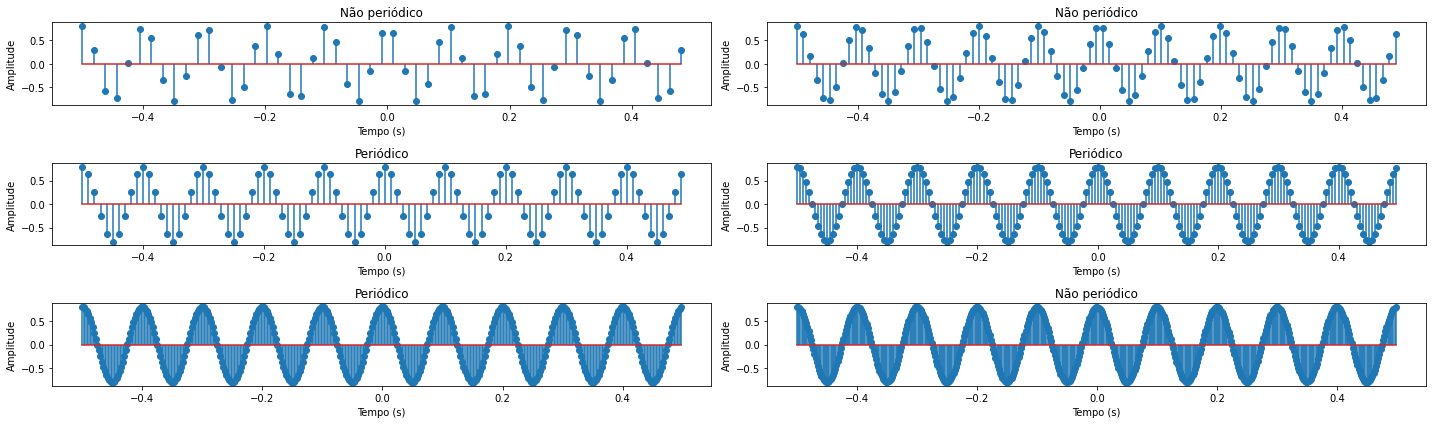

In [2]:
fig, axs = plt.subplots(3,2,figsize=(20,6))

A   = 0.8
f0  = 10
fss = np.array([53, 93, 100, 200, 400, 517])
phi = 0
isMultiple = lambda f0,fs: "Periódico" if int(fs/f0) == fs/f0 else "Não periódico"

titles = map(partial(isMultiple,f0),fss)

for ax, fs, title in zip(axs.flatten(), fss, titles):
    
    T   = 1/fs 
    t   = np.arange(-0.5,0.5, T)
    x   = A*np.cos(2*np.pi*f0*t+phi)
    ax.stem(t,x)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"{title}")
    
plt.tight_layout()

<span style='color:red'> Qual o problema de utilizarmos sinais não periódicos? </span>

### **Nyquist Aliasing**

Melhorar texto de Nyquist

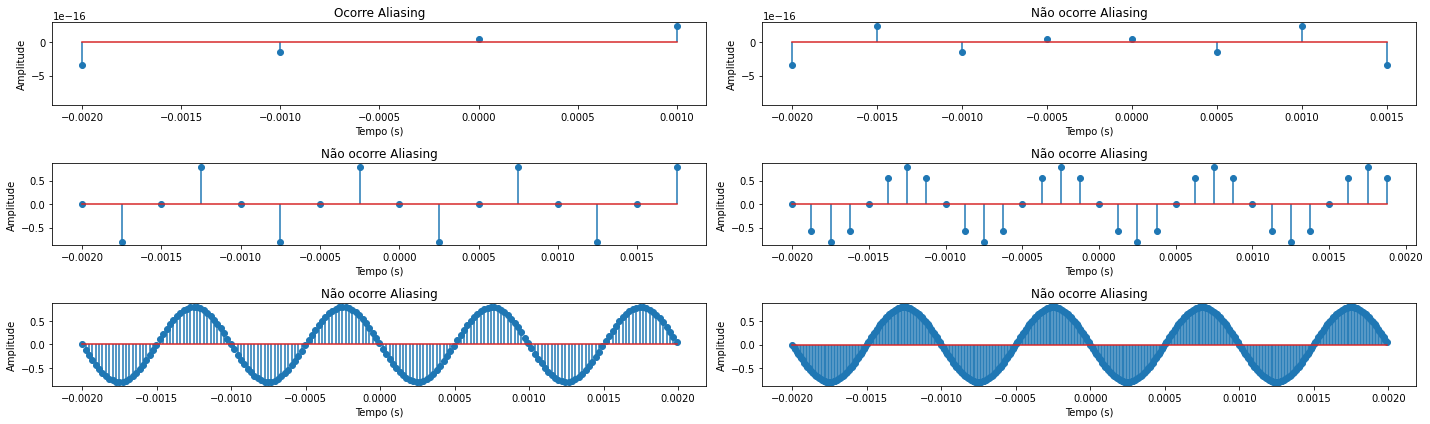

In [3]:
fig, axs = plt.subplots(3,2,figsize=(20,6))

A      = 0.8
f0     = 1000
phi    = np.pi/2
fss    = [1000, 2000, 4000, 8000, 44100, 100000]
respectNyquist = lambda f0, fs: "Não ocorre Aliasing" if fs >= 2*f0 else "Ocorre Aliasing"
titles = map(partial(respectNyquist,f0),fss)
for ax, fs, title in zip(axs.flatten(), fss, titles):
    
    T   = 1/fs 
    t   = np.arange(-.002,.002, T)
    x   = A*np.cos(2*np.pi*f0*t+phi)
    ax.stem(t,x)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"{title}")

plt.tight_layout()
plt.show()

## **Discrete Fourier Transform** 

$X[k] = \sum_{n=0}^{N-1}x[n]e^{\frac{-j2\pi kn}{N}}$, $k = 0, 1, ..., N-1$

- $N$: É o número de amostras do sinal. 
- $n:$ index discreto no tempo (tempo normalizado, T=1).
- $k:$ index discreto na frequência.
- $\omega_k = (\frac{2\pi k}{N}):$ frequência em $\frac{radianos}{segundos}$.
- $f_k = (\frac{f_s k}{N}):$ frequência em Hz ($f_s$: frequência de amostragem).

In [ ]:
X = np.array([])

"""
Para calcular 1 valor de n precisamos
"""
for k in range(N):
    k = np.arange(N)
    np.exp(-1j*(2*np.pi*k)/N)

In [5]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## **Inverse Discrete Fourier Transform** 

$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{\frac{j 2\pi kn}{N}}$, $n = 0,1, ... , N-1$

## **Complex Numbers** 

Um número complexo pode ser representado nas seguintes formas 

- Retangular: $(a +jb)$ onde $a$ é a **parte real** e $b$ a **parte imaginária**.
- Polar: $A = \sqrt{a^2+b^2}$ e 
   - Se $a>0$ $\phi = tan^{-1}(\frac{b}{a})$
   - então $a<0$ $\phi = tan^{-1}(\frac{b}{a}) - \pi$


## **Euler's Formula** 

$e^{j\varphi} = cos(\varphi) + jsin(\varphi)$

$cos(\varphi) = \frac{e^{j\varphi} \text{ + } e^{-j\varphi}}{2}$

$sin(\varphi) = \frac{e^{j\varphi} \text{ - } e^{-j\varphi}}{2}$

Uma senoide tem uma frequência e uma fase:

In [ ]:
f0  = 2     #Frequência da senoide
phi = 0     #Fase da senoide

Suponha que a gente tenho um sinal contínuo no tempo entre 0 e 1s. No computador isso seria representado por um vetor infinito. Entretanto, não podemos alocar um vetor infinito, logo, precisamos de amostras dentro desse intervalo para pelo menos visualizar a nossa senoide, processo conhecido como **amostragem**.

In [ ]:
t   = np.arange(0, 1, T)

In [ ]:
"""

"""
fs  = 1000

T   = 1/fs 
t   = np.arange(0, 1, T)
x   = np.sin(2*np.pi*f0*t+phi)

plt.plot(t,x)
plt.show()

In [ ]:
1/2.5

In [ ]:
complex_sinusoid = np.exp(2j)
complex_sinusoid

In [ ]:
np.arange(-1,1,100)

In [ ]:
e1 = np.exp(1j*np.pi/2); e2 = np.exp(-1j*np.pi/2)

np.cos(-np.pi/2) - 1j*np.sin(-np.pi/2)

print(f"Parte real: {(e1+e2)/2}")
print(f"Parte img: {(e1-e2)/2}")

## **Complex Sinewave**

Algumas das representações:
- $\overline{x}[n] = Ae^{j(wnT +\phi)} =Ae^{j\phi}e^{jwnT} = Xe^{j(wnT)}$

- $\overline{x}[n] = Acos(wnT+\phi) + jAsin(wnT + \phi)$

## **Real Sinewave**

$x[n] = Acos(\omega n T + \phi) = \frac{A}{2}(e^{j(\omega nT + \phi)}+ e^{-j(\omega nT + \phi)}) = \frac{1}{2}\overline{x}[n] + \frac{1}{2}\overline{x}^*[n] = \Re\{\overline{x}[n]\}$

Uma senoide real pode ser escrita como 2 senoide complexas!